In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [91]:
df = pd.read_csv("bus_train.csv", index_col=0)
df2 = pd.read_csv("bus_train_1.csv", index_col=0)
df.head()

,Timestamp_x,segment_id,HalfHourly,intersections_y,busstops_y,DayOfWeek_y,Holiday_y,BusLane_y,AvgSpeed
NewVehicleRef,,,,,,,,,
MTA NYCT_3829_1,2018-04-08 16:00:17.604000-04:00,2,0,15,5,7,1,False,2.445659
MTA NYCT_3829_1,2018-04-08 16:07:40.959000-04:00,3,0,16,6,7,1,False,1.806298
MTA NYCT_3829_1,2018-04-08 16:16:56.783000-04:00,4,0,9,1,7,1,False,1.597098
MTA NYCT_3829_1,2018-04-08 16:21:42.724000-04:00,5,0,8,3,7,1,False,2.701809
MTA NYCT_3829_1,2018-04-08 16:23:49.024000-04:00,6,0,9,3,7,1,False,3.600640


In [85]:
df.columns

Index(['Timestamp_x', 'segment_id', 'HalfHourly', 'intersections_y',
       'busstops_y', 'DayOfWeek_y', 'Holiday_y', 'BusLane_y', 'AvgSpeed'],
      dtype='object')

In [92]:
df2.columns

Index(['NewVehicleRef', 'Timestamp_x', 'segment_id', 'BusLane_x',
       'DayOfWeek_x', 'Holiday_x', 'HalfHourly', 'timeinseconds',
       'intersections', 'busstops', 'AvgSpeed'],
      dtype='object')

In [94]:
df = df[['Timestamp_x', 'segment_id', 'BusLane_y', 'DayOfWeek_y', 'Holiday_y',
         'HalfHourly', 'intersections_y', 'busstops_y', 'AvgSpeed']]
df2 = df2[['NewVehicleRef', 'Timestamp_x', 'segment_id', 'BusLane_x',
       'DayOfWeek_x', 'Holiday_x', 'HalfHourly', 'timeinseconds',
       'intersections', 'busstops', 'AvgSpeed']]

In [95]:
df.columns = ['timestamp', 'segment', 'buslane', 'dayofweek', 'holiday',
              'halfhourly', 'intersections', 'busstops', 'avgspeed']
df2.columns = ['NewVehicleRef', 'timestamp', 'segment', 'buslane',
               'dayofweek', 'holiday', 'halfhourly', 'timeinseconds',
               'intersections', 'busstops', 'avgspeed']

In [90]:
df.shape

(1103, 11)

In [97]:
len(df[df['avgspeed'] < 0]) / len(df) * 100, len(df2[df2['avgspeed'] < 0]) / len(df2) * 100

(0.09066183136899365, 0.09066183136899365)

In [98]:
df = df[df['avgspeed'] > 0]
df2 = df2[df2['avgspeed'] > 0]

In [123]:
# X = df[['segment', 'buslane', 'dayofweek', 'holiday',
#         'halfhourly', 'intersections', 'busstops']]
# y = df['avgspeed']


X = df2[['segment', 'buslane', 'dayofweek', 'holiday',
         'halfhourly', 'intersections', 'busstops', 'timeinseconds']]
y = df2['avgspeed']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2018)

In [125]:
X.columns

Index(['segment', 'buslane', 'dayofweek', 'holiday', 'intersections',
       'busstops', 'timeinseconds'],
      dtype='object')

In [126]:
rf = RandomForestRegressor(max_depth=6, n_estimators=30, n_jobs=-1, max_leaf_nodes=30, random_state=99)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=30,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=99, verbose=0, warm_start=False)

In [121]:
print(rf.feature_importances_)

[0.23276078 0.11560015 0.22108912 0.01411618 0.02299195 0.03273442
 0.00725923 0.35344817]


In [127]:
print(rf.feature_importances_)

[0.23392804 0.11745669 0.22552411 0.01146322 0.0320695  0.00474196
 0.37481647]


In [78]:
print(rf.feature_importances_)

[0.50692696 0.3914724  0.03187845 0.00698343 0.0427406  0.00382212
 0.01617605]


In [73]:
print(rf.feature_importances_)

[0.56280532 0.39846152 0.03057554 0.0016259  0.00406385 0.
 0.00246788]


In [104]:
print(rf.predict([[2, 3, 15, 5, 2, 0, 1]]))

[2.48533393]


In [105]:
print(rf.predict([[2, 3, 15, 5, 7, 1, 0]]))

[4.17051684]


In [116]:
df['avgspeed'].mean()

2.3536132859294634

In [128]:
res = list(rf.predict(X_test) - y_test)
np.mean(res), np.std(res)

(-0.00766076708132315, 0.879658085407971)

In [122]:
res = list(rf.predict(X_test) - y_test)
np.mean(res), np.std(res)

(-0.00725837596219538, 0.8796210918621244)

In [115]:
modelPred = rf.predict(X_test)

print(modelPred)
print("Number of predictions:", len(modelPred))

MSE = mean_squared_error(y_test, modelPred)

print("MSE:", MSE)

[1.83099109 2.76172275 2.08599388 2.59479956 2.2864508  2.08943553
 2.0400443  2.69615055 2.05382341 2.7118128  2.85065963 2.33032445
 2.61262991 1.68575198 2.263362   2.13001068 2.53345245 2.83731718
 2.15350852 4.26678602 2.79990225 2.05382341 2.08837637 2.04363378
 2.04363378 3.3435932  2.30383198 2.12624436 2.88442769 2.31174668
 2.31029551 2.05416215 1.85460519 3.22135935 2.05932266 2.05625648
 2.04363378 2.05573318 2.75892332 2.10748557 3.96749291 2.94772145
 2.12224026 2.05625648 2.10748557 1.67836736 1.83295328 2.06462157
 3.58387296 3.52811214 7.42875575 2.89840805 2.24487406 2.18625371
 2.76172275 2.06462157 2.36934862 2.08943553 2.08781149 2.05932266
 2.05416215 2.83731718 2.04363378 2.51484288 2.64770211 2.90636646
 2.35435179 2.05382341 2.05625648 0.89567576 1.88810447 2.61262991
 2.05625648 2.33032445 2.4505328  2.05932266 1.71511601 2.14857698
 4.83137444 2.03813453 2.69208816 2.03813453 2.94772145 3.5601098
 2.88331994 2.88442769 6.09106742 2.09343963 2.05625648 2.05932

In [131]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 10)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 100, num = 11)]
# Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_leaf_nodes': range(2,30,3),
               'bootstrap': bootstrap}
print(random_grid)



{'n_estimators': [20, 51, 82, 113, 144, 175, 206, 237, 268, 300], 'max_depth': [5, 14, 24, 33, 43, 52, 62, 71, 81, 90, 100], 'max_leaf_nodes': range(2, 30, 3), 'bootstrap': [True, False]}


In [133]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False 
[CV] n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False 
[CV] n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False 
[CV] n_estimators=144, max_leaf_nodes=11, max_depth=24, bootstrap=False 
[CV]  n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False, total=   0.2s
[CV] n_estimators=144, max_leaf_nodes=11, max_depth=24, bootstrap=False 
[CV]  n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False, total=   0.2s
[CV] n_estimators=144, max_leaf_nodes=11, max_depth=24, bootstrap=False 
[CV]  n_estimators=51, max_leaf_nodes=17, max_depth=33, bootstrap=False, total=   0.2s
[CV] n_estimators=51, max_leaf_nodes=20, max_depth=62, bootstrap=False 
[CV]  n_estimators=51, max_leaf_nodes=20, max_depth=62, bootstrap=False, total=   0.2s
[CV] n_estimators=51, max_leaf_nodes=20, max_depth=62, bootstrap=False 
[CV]  n_es

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s


[CV]  n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=True, total=   0.5s
[CV] n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=True 
[CV]  n_estimators=268, max_leaf_nodes=23, max_depth=71, bootstrap=False, total=   1.0s
[CV] n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=True 
[CV]  n_estimators=268, max_leaf_nodes=23, max_depth=71, bootstrap=False, total=   0.9s
[CV] n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=False 
[CV]  n_estimators=268, max_leaf_nodes=23, max_depth=71, bootstrap=False, total=   1.0s
[CV] n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=False 
[CV]  n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=True, total=   0.6s
[CV] n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=False 
[CV]  n_estimators=175, max_leaf_nodes=5, max_depth=90, bootstrap=True, total=   0.5s
[CV] n_estimators=206, max_leaf_nodes=23, max_depth=71, bootstrap=False 
[CV]  n_estimators=175, max_leaf_nodes=5, max_d

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   22.3s


[CV]  n_estimators=144, max_leaf_nodes=2, max_depth=100, bootstrap=False, total=   0.3s
[CV] n_estimators=144, max_leaf_nodes=2, max_depth=100, bootstrap=False 
[CV]  n_estimators=268, max_leaf_nodes=5, max_depth=62, bootstrap=True, total=   0.6s
[CV] n_estimators=144, max_leaf_nodes=2, max_depth=100, bootstrap=False 
[CV]  n_estimators=268, max_leaf_nodes=5, max_depth=62, bootstrap=True, total=   0.6s
[CV] n_estimators=144, max_leaf_nodes=17, max_depth=33, bootstrap=True 
[CV]  n_estimators=268, max_leaf_nodes=5, max_depth=62, bootstrap=True, total=   0.7s
[CV] n_estimators=144, max_leaf_nodes=17, max_depth=33, bootstrap=True 
[CV]  n_estimators=144, max_leaf_nodes=2, max_depth=100, bootstrap=False, total=   0.4s
[CV] n_estimators=144, max_leaf_nodes=17, max_depth=33, bootstrap=True 
[CV]  n_estimators=144, max_leaf_nodes=2, max_depth=100, bootstrap=False, total=   0.4s
[CV] n_estimators=144, max_leaf_nodes=20, max_depth=81, bootstrap=False 
[CV]  n_estimators=144, max_leaf_nodes=17, 

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   37.8s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [20, 51, 82, 113, 144, 175, 206, 237, 268, 300], 'max_depth': [5, 14, 24, 33, 43, 52, 62, 71, 81, 90, 100], 'max_leaf_nodes': range(2, 30, 3), 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [135]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('MAPE = {:0.2f}%.'.format(mape))
    
    return accuracy
base_model = RandomForestRegressor(max_depth=6, n_estimators=30, n_jobs=-1, max_leaf_nodes=30, random_state=99)
# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.5620 degrees.
Accuracy = 65.90%.
MAPE = 34.10%.
Model Performance
Average Error: 0.5628 degrees.
Accuracy = 64.95%.
MAPE = 35.05%.
Improvement of -1.45%.


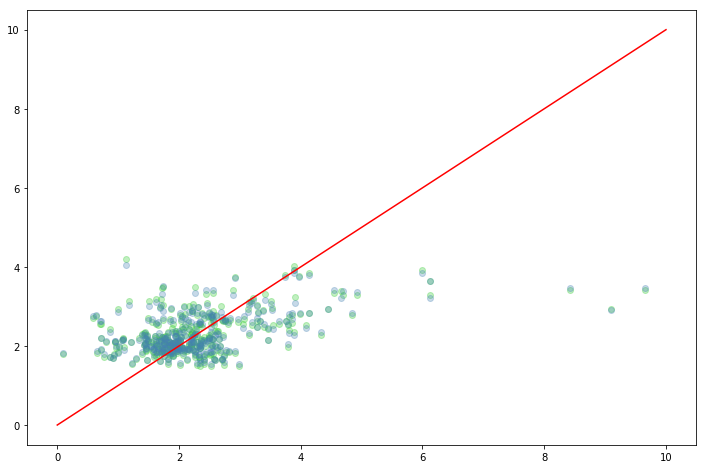

In [180]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# ax.scatter(y_test, base_model.predict(X_test), color='steelblue', alpha=0.3)
ax.scatter(y_test, predicted, color='limegreen', alpha=0.3)
ax.scatter(y_test, p_OS, color='steelblue', alpha=0.3)

ax.plot([0,10], [0,10], 'r')


In [142]:
from sklearn import linear_model

In [143]:
#OLS
# Create linear regression object
model = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training set
model.fit(X=X_train, y=y_train)

# Make predictions using the testing set
predicted = model.predict(X_test)

# Find R^2 for InSample (train sample)
R_2_IS = model.score(X=X_train, y=y_train)

# Find R^2 for OutSample (test sample)
R_2_OS = model.score(X=X_test, y=y_test)

# A worse model will give negative R^2
print("The R-squared we found for IS OLS is: {0}".format(R_2_IS))
print("The R-squared we found for OS OLS is: {0}".format(R_2_OS))

The R-squared we found for IS OLS is: 0.24207479517596073
The R-squared we found for OS OLS is: 0.2223233780519529


In [166]:
#For Lasso
lasso_alpha=300

# Create Lasso regression object
Lasso=linear_model.Lasso(fit_intercept=True, alpha=lasso_alpha)

# Train the model using the training set
Lasso.fit(X_train, y_train)

# Prediction on the InSample data (train) 
p_IS=Lasso.predict(X_train)

# InSample R^2: 
print("The R-squared we found for IS Lasso is: {0}".format(Lasso.score(X=X_train, y=y_train)))

# Prediction on the OutSample data (test) 
p_OS=Lasso.predict(X_test)

# OutSample R^2: 
print("The R-squared we found for OS Lasso is: {0}".format(Lasso.score(X=X_test, y=y_test)))

The R-squared we found for IS Lasso is: 0.04421274461993452
The R-squared we found for OS Lasso is: 0.05566243173213869


In [178]:
# For Ridge
ridge_alpha = 10

# Create Ridge regression object
Ridge=linear_model.Ridge(fit_intercept=True,alpha=ridge_alpha) 

# Train the model using the training set
Ridge.fit(X_train, y_train)

# Prediction on the InSample data (train) 
p_IS=Ridge.predict(X_train)

# InSample R^2: 
print("The R-squared we found for IS Ridge is: {0}".format(Ridge.score(X_train, y_train)))
    
# Prediction on the OutSample data (test) 
p_OS=Ridge.predict(X_test)

# OutSample R^2: 
print("The R-squared we found for OS Ridge is: {0}".format(Ridge.score(X_test,y_test)))

The R-squared we found for IS Ridge is: 0.24381298940012197
The R-squared we found for OS Ridge is: 0.23639815625391317


In [151]:
model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [153]:
mean_squared_error(y_test, predicted)

0.9326251925524984

In [155]:
mean(list(predicted - y_test)), std(list(predicted - y_test))

(0.00511587271719775, 0.9657116652494365)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid ={'alpha':np.logspace(-4, 0, 200)}

OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = i)
    rid=linear_model.Ridge()
    gr=GridSearchCV(rid,param_grid=param_grid)
    rs=gr.fit(X_train,y_train)
    print rs.best_params_
    OS.append(1-((rs.predict(X_test)-y_test)**2).mean()/y_test.var())
print np.mean(OS)

In [49]:
len(list(range(1,100000,500)))

200

In [55]:
param_grid = {'max_depth':range(3,15),
              'n_estimators':range(1,100,5),
              'max_leaf_nodes':range(2,30,3),
              'random_state':range(1,100000,7000)}
rf = RandomForestRegressor(n_jobs=-1)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='neg_mean_squared_error')
rs = gs.fit(X_train,y_train)
print(rs.best_params_)

KeyboardInterrupt: 